In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'Twitter-sentiment-self-drive-DFE.csv', encoding='utf-8', encoding_errors='ignore')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7156 entries, 0 to 7155
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               7156 non-null   int64  
 1   _golden                7156 non-null   bool   
 2   _unit_state            7156 non-null   object 
 3   _trusted_judgments     7156 non-null   int64  
 4   _last_judgment_at      7079 non-null   object 
 5   sentiment              7156 non-null   object 
 6   sentiment:confidence   7156 non-null   float64
 7   our_id                 7156 non-null   int64  
 8   sentiment_gold         77 non-null     object 
 9   sentiment_gold_reason  77 non-null     object 
 10  text                   7156 non-null   object 
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 566.2+ KB


In [6]:
df.shape

(7156, 11)

In [7]:
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,our_id,sentiment_gold,sentiment_gold_reason,text
0,724227031,True,golden,236,NaN,5,0.7579,10001,5\n4,Author is excited about the development of the...,Two places I'd invest all my money if I could:...
1,724227032,True,golden,231,NaN,5,0.8775,10002,5\n4,Author is excited that driverless cars will be...,Awesome! Google driverless cars will help the ...
2,724227033,True,golden,233,NaN,2,0.6805,10003,2\n1,The author is skeptical of the safety and reli...,If Google maps can't keep up with road constru...
3,724227034,True,golden,240,NaN,2,0.8820,10004,2\n1,The author is skeptical of the project's value.,Autonomous cars seem way overhyped given the t...
4,724227035,True,golden,240,NaN,3,1.0000,10005,3,Author is making an observation without expres...,Just saw Google self-driving car on I-34. It w...


NameError: name 'go' is not defined

In [6]:
df.rename(columns={"sentiment:confidence": "sentiment_confidence"}, inplace=True)

In [5]:
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment_confidence,our_id,sentiment_gold,sentiment_gold_reason,text
0,724227031,True,golden,236,NaN,5,0.7579,10001,5\n4,Author is excited about the development of the...,Two places I'd invest all my money if I could:...
1,724227032,True,golden,231,NaN,5,0.8775,10002,5\n4,Author is excited that driverless cars will be...,Awesome! Google driverless cars will help the ...
2,724227033,True,golden,233,NaN,2,0.6805,10003,2\n1,The author is skeptical of the safety and reli...,If Google maps can't keep up with road constru...
3,724227034,True,golden,240,NaN,2,0.8820,10004,2\n1,The author is skeptical of the project's value.,Autonomous cars seem way overhyped given the t...
4,724227035,True,golden,240,NaN,3,1.0000,10005,3,Author is making an observation without expres...,Just saw Google self-driving car on I-34. It w...


/Users/saulvergaray/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


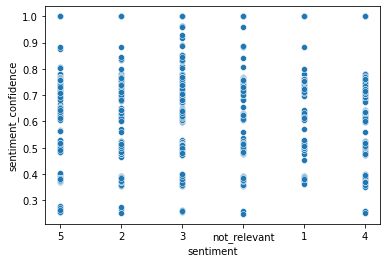

In [9]:
sns.scatterplot(df.sentiment, df.sentiment_confidence);

In [11]:
pie_df = df.query('sentiment_confidence > 0.8').copy()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7156 entries, 0 to 7155
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               7156 non-null   int64  
 1   _golden                7156 non-null   bool   
 2   _unit_state            7156 non-null   object 
 3   _trusted_judgments     7156 non-null   int64  
 4   _last_judgment_at      7079 non-null   object 
 5   sentiment              7156 non-null   object 
 6   sentiment_confidence   7156 non-null   float64
 7   our_id                 7156 non-null   int64  
 8   sentiment_gold         77 non-null     object 
 9   sentiment_gold_reason  77 non-null     object 
 10  text                   7156 non-null   object 
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 566.2+ KB


In [13]:
pie_df.describe()

,_unit_id,_trusted_judgments,sentiment_confidence,our_id
count,2.743000e+03,2743.000000,2743.000000,2743.000000
mean,7.243532e+08,4.168429,0.998240,3610.386074
std,2.817135e+05,12.189905,0.016116,2151.731837
min,7.242270e+08,1.000000,0.800100,1.000000
25%,7.243229e+08,3.000000,1.000000,1800.000000
50%,7.243248e+08,3.000000,1.000000,3521.000000
75%,7.243265e+08,3.000000,1.000000,5353.000000
max,7.269423e+08,241.000000,1.000000,10077.000000


In [14]:
pie_df.drop(columns=['sentiment_gold', 'sentiment_gold_reason'], inplace=True)
pie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2743 entries, 1 to 7155
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   _unit_id              2743 non-null   int64  
 1   _golden               2743 non-null   bool   
 2   _unit_state           2743 non-null   object 
 3   _trusted_judgments    2743 non-null   int64  
 4   _last_judgment_at     2706 non-null   object 
 5   sentiment             2743 non-null   object 
 6   sentiment_confidence  2743 non-null   float64
 7   our_id                2743 non-null   int64  
 8   text                  2743 non-null   object 
dtypes: bool(1), float64(1), int64(3), object(4)
memory usage: 195.5+ KB


In [17]:
pie_df.query('sentiment_confidence == "golden"')

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment_confidence,our_id,text


In [18]:
pie_df.isin(['golden']).any()

_unit_id                False
_golden                 False
_unit_state              True
_trusted_judgments      False
_last_judgment_at       False
sentiment               False
sentiment_confidence    False
our_id                  False
text                    False
dtype: bool

In [19]:
pie_df._unit_state

1       golden
3       golden
4       golden
5       golden
10      golden
         ...  
7149    golden
7150    golden
7153    golden
7154    golden
7155    golden
Name: _unit_state, Length: 2743, dtype: object

In [20]:
pie_df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment_confidence,our_id,text
1,724227032,True,golden,231,NaN,5,0.8775,10002,Awesome! Google driverless cars will help the ...
3,724227034,True,golden,240,NaN,2,0.8820,10004,Autonomous cars seem way overhyped given the t...
4,724227035,True,golden,240,NaN,3,1.0000,10005,Just saw Google self-driving car on I-34. It w...
5,724227036,True,golden,241,NaN,3,1.0000,10006,Will driverless cars eventually replace taxi d...
10,724227041,True,golden,235,NaN,3,0.9184,10011,"Driverless cars are now legal in Florida, Cali..."


In [21]:
pie_df.sentiment.value_counts()

3               2106
4                334
2                160
5                 82
not_relevant      42
1                 19
Name: sentiment, dtype: int64

In [22]:
new_df= pd.DataFrame(data = pie_df.sentiment.value_counts())

In [24]:
new_df

,sentiment
3,2106
4,334
2,160
5,82
not_relevant,42
1,19


In [25]:
new_df.reset_index(inplace=True)

In [26]:
new_df

,index,sentiment
0,3,2106
1,4,334
2,2,160
3,5,82
4,not_relevant,42
5,1,19


In [27]:
new_df.columns= ['sentiment', 'count']

In [28]:
new_df

,sentiment,count
0,3,2106
1,4,334
2,2,160
3,5,82
4,not_relevant,42
5,1,19


In [29]:
new_df.drop(index = 4, axis = 0, inplace=True)
new_df

,sentiment,count
0,3,2106
1,4,334
2,2,160
3,5,82
5,1,19


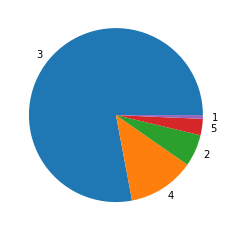

In [34]:
data = new_df['count']
my_labels = new_df.sentiment
plt.pie(data, labels= my_labels);

In [31]:
plt.pie(data= new_df, labels= new_df.sentiment)

TypeError: pie() missing 1 required positional argument: 'x'